# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Importing DataSets


In [2]:
dataset=pd.read_csv('pakwheels.csv')
# dataset=pd.read_csv('pakwheels2.csv')
# droping name column from data sets
dataset.drop('Name', axis=1, inplace=True)
# Removing All Rows which consisist Call in Price column which is not useable
dataset=dataset[dataset['Price'].str.contains("Call")==False]
dataset=dataset[dataset['Price'].str.contains("Grade")==False]
dataset=dataset[dataset['Price'].str.contains("#")==False]
dataset=dataset[dataset['Price'].str.contains("A")==False]



In [3]:
dataset.head()

,Year,KM,FuelType,Engine,DriveType,Price
0,2011,"91,098",Petrol,1800.0,Automatic,"2,075,000"
1,2019,"53,000",Petrol,1600.0,Automatic,"3,625,000"
2,2013,"72,000",Petrol,1800.0,Automatic,"2,425,000"
3,2005,"56,455",Petrol,2700.0,Automatic,6500000
4,2016,"52,000",Petrol,1300.0,Manual,"2,380,000"


In [4]:
# checking how many values exisists in colum 
dataset['FuelType'].value_counts()

Petrol      22721
Diesel       1183
Hybrid        922
CNG           164
Electric       44
LPG             3
Name: FuelType, dtype: int64

In [5]:
dataset['DriveType'].value_counts()

Automatic    15030
Manual       10007
Name: DriveType, dtype: int64

# Encoding Caterogical Values

In [6]:
# Encoding DriveType Because it only contains two values
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# lable = le.fit_transform(dataset['DriveType'])

# dataset.drop('DriveType', axis=1, inplace=True)

# dataset['DriveType'] = lable



# changine the direction of columns
# dataset.drop('FuelType', axis=1, inplace=True)
# dataset = dataset[['Year', 'KM', 'FuelType','DriveType', 'Price']]


# removing all , from datasets
dataset.replace(',','', regex=True, inplace=True)
dataset.head()





,Year,KM,FuelType,Engine,DriveType,Price
0,2011,91098,Petrol,1800.0,Automatic,2075000
1,2019,53000,Petrol,1600.0,Automatic,3625000
2,2013,72000,Petrol,1800.0,Automatic,2425000
3,2005,56455,Petrol,2700.0,Automatic,6500000
4,2016,52000,Petrol,1300.0,Manual,2380000


In [7]:
# fuel_type=pd.get_dummies(dataset['FuelType'])
# # fuel_type.head(50)
# dataset=pd.concat([dataset,fuel_type],axis=1)
# # dataset=pd.concat([fuel_type],axis=1)
# dataset.head()

In [8]:
# converting KM to int 
dataset['KM'] = dataset['KM'].astype(int)
# converting price to int
dataset['Price'] = dataset['Price'].astype(int)

# Matplot 


In [9]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'KM'}>],
       [<AxesSubplot:title={'center':'Engine'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

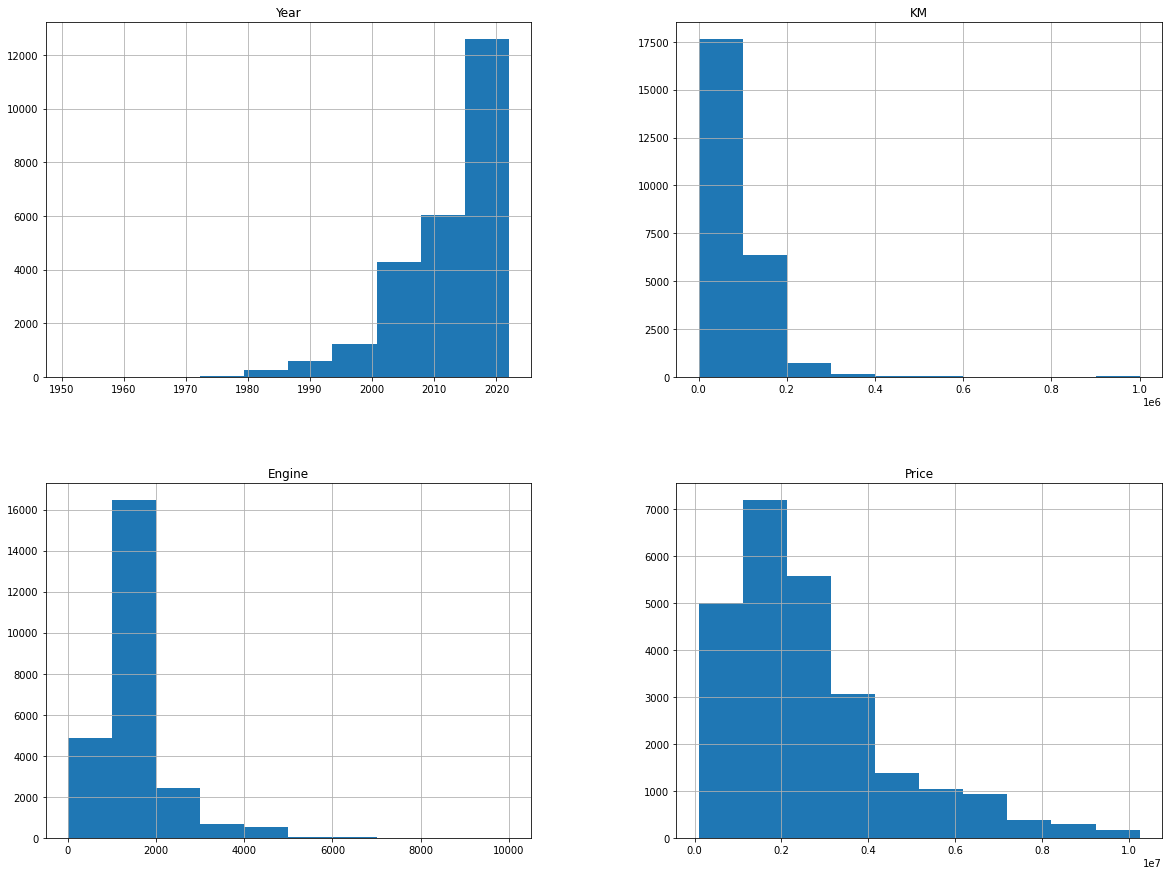

In [10]:
dataset.hist(bins=10, figsize=(20,15))

In [11]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [12]:
print(X)


[[2011 91098 'Petrol' 1800.0 'Automatic']
 [2019 53000 'Petrol' 1600.0 'Automatic']
 [2013 72000 'Petrol' 1800.0 'Automatic']
 ...
 [2001 115437 'Petrol' 1300.0 'Manual']
 [2011 2222 'Petrol' 1300.0 'Manual']
 [2006 99999 'Petrol' 1800.0 'Automatic']]


In [13]:
print(y)

[2075000 3625000 2425000 ...  650000 1430000 1685000]


# Applying One Hot Encode

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder' , OneHotEncoder() , [2,4] )], remainder="passthrough")


X=ct.fit_transform(X)

In [15]:
print(X)

[[0.0 0.0 0.0 ... 2011 91098 1800.0]
 [0.0 0.0 0.0 ... 2019 53000 1600.0]
 [0.0 0.0 0.0 ... 2013 72000 1800.0]
 ...
 [0.0 0.0 0.0 ... 2001 115437 1300.0]
 [0.0 0.0 0.0 ... 2011 2222 1300.0]
 [0.0 0.0 0.0 ... 2006 99999 1800.0]]


# For CooRelation

In [16]:
corr_matrix=dataset.corr()

In [17]:
corr_matrix['Price'].sort_values(ascending=False)
# positive coo relation means if one variable value increase other also increace
# Neagtive coo relation means if one variable value increase other decreasse

Price     1.000000
Year      0.475305
Engine    0.421834
KM       -0.287804
Name: Price, dtype: float64

In [18]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='KM', ylabel='Year'>,
        <AxesSubplot:xlabel='Engine', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='KM'>,
        <AxesSubplot:xlabel='KM', ylabel='KM'>,
        <AxesSubplot:xlabel='Engine', ylabel='KM'>],
       [<AxesSubplot:xlabel='Year', ylabel='Engine'>,
        <AxesSubplot:xlabel='KM', ylabel='Engine'>,
        <AxesSubplot:xlabel='Engine', ylabel='Engine'>]], dtype=object)

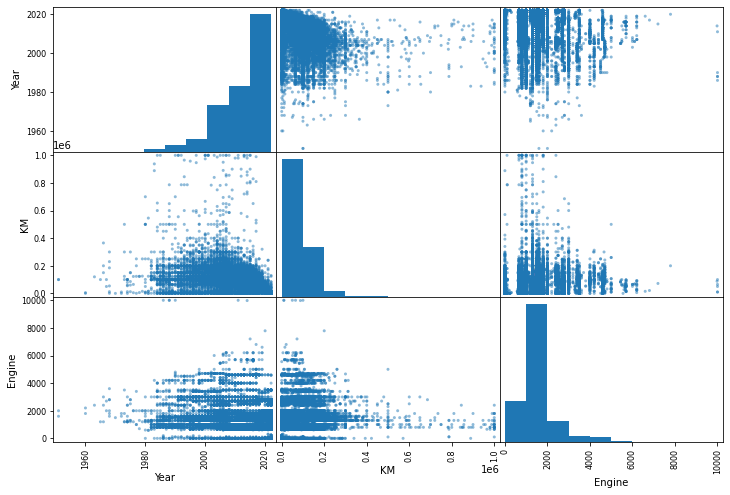

In [19]:
attributes=['Year',  'KM', 'FuelType','Engine','DriveType']
scatter_matrix(dataset[attributes] , figsize=(12,8))

In [20]:
from sklearn import preprocessing 

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
y= min_max_scaler.fit_transform(y.reshape(-1, 1))
X= min_max_scaler.fit_transform(X)


print(y)
print(X)

[[0.19537402]
 [0.34793307]
 [0.22982283]
 ...
 [0.05511811]
 [0.13188976]
 [0.15698819]]
[[0.         0.         0.         ... 0.84507042 0.09109709 0.18      ]
 [0.         0.         0.         ... 0.95774648 0.05299905 0.16      ]
 [0.         0.         0.         ... 0.87323944 0.07199907 0.18      ]
 ...
 [0.         0.         0.         ... 0.70422535 0.11543612 0.13      ]
 [0.         0.         0.         ... 0.84507042 0.002221   0.13      ]
 [0.         0.         0.         ... 0.77464789 0.0999981  0.18      ]]


# Spilting The DataSets

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [22]:
print(y_test)
print(X_test)

[[0.24704724]
 [0.1230315 ]
 [0.16338583]
 ...
 [0.15108268]
 [0.93602362]
 [0.12893701]]
[[0.         0.         0.         ... 0.88732394 0.02199902 0.066     ]
 [0.         0.         0.         ... 0.78873239 0.0979991  0.13      ]
 [0.         0.         0.         ... 0.81690141 0.07904708 0.13      ]
 ...
 [0.         0.         0.         ... 0.81690141 0.001583   0.1       ]
 [0.         1.         0.         ... 0.94366197 0.05199905 0.28      ]
 [0.         0.         0.         ... 0.66197183 0.0999991  0.2       ]]


# Traning Desecion Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [24]:
y_pred = dt_regressor.predict(X_test)
print(y_pred)

[0.11909449 0.16141732 0.14370079 ... 0.17322835 0.94586614 0.14862205]


In [25]:
from sklearn.metrics import r2_score
print(f"R2 Squre of Desecion Tree Regressor is {r2_score(y_test, y_pred)}")

R2 Squre of Desecion Tree Regressor is 0.6967196246835405


# Traning Multiple Linear  Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression()
lr_regressor.fit(X_train,y_train)


LinearRegression()

In [27]:
y_pred = lr_regressor.predict(X_test)
print(y_pred)

[[0.24816895]
 [0.11984253]
 [0.1401062 ]
 ...
 [0.23474121]
 [0.49905396]
 [0.09591675]]


In [28]:
from sklearn.metrics import r2_score
print(f"R2 Squre of Multiple Regressor is {r2_score(y_test, y_pred)}")
line_mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(line_mse)
print(f"RMSE {rmse}")
print(f"Mean Absolute Error {mae}")
print(f"Mean Squre Error {line_mse}")

R2 Squre of Multiple Regressor is 0.5305021846398736
RMSE 0.13179636414472884
Mean Absolute Error 0.08796596382672565
Mean Squre Error 0.017370281601769965


# Training the Polynomial Regression model on the Training set

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
p_regressor = LinearRegression()
p_regressor.fit(X_poly, y_train)


LinearRegression()

In [30]:
y_pred = p_regressor.predict(poly_reg.transform(X_test))
print(y_pred)

[[0.20794678]
 [0.10888672]
 [0.11889648]
 ...
 [0.15385437]
 [0.56112671]
 [0.15144348]]


In [31]:
from sklearn.metrics import r2_score
print(f"R2 Squre of  Polynomial Regression is {r2_score(y_test, y_pred)}")

line_mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(line_mse)
print(f"RMSE {rmse}")
print(f"Mean Absolute Error {mae}")
print(f"Mean Squre Error {line_mse}")

R2 Squre of  Polynomial Regression is -45937803868133.19
RMSE 1303682.2613006346
Mean Absolute Error 31401.760003411804
Mean Squre Error 1699587438429.936


# Training the Random Forest Regression model

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)

C:\Users\DELL 95\AppData\Local\Temp\ipykernel_15536\2647439645.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [33]:
y_pred = rf_regressor.predict(X_test)
print(y_pred)
print(y_test)

[0.13863189 0.15127953 0.16087598 ... 0.15767717 0.90086942 0.12223425]
[[0.24704724]
 [0.1230315 ]
 [0.16338583]
 ...
 [0.15108268]
 [0.93602362]
 [0.12893701]]


In [34]:
from sklearn.metrics import r2_score
print(f"R2 Squre ofRandom Forest Regression is {r2_score(y_test, y_pred)}")

R2 Squre ofRandom Forest Regression is 0.7472462317950487


In [35]:

line_mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(line_mse)
print(f"RMSE {rmse}")
print(f"Mean Absolute Error {mae}")
print(f"Mean Squre Error {line_mse}")

RMSE 0.0967020010938288
Mean Absolute Error 0.046728442561987785
Mean Squre Error 0.009351277015550868


In [36]:

# y=y.reshape(len(y),1)
# from sklearn.preprocessing import StandardScaler
# # we use feature scalling for the both X and Y 
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)

# from sklearn.svm import SVR
# sv_regressor = SVR(kernel = 'rbf')
# sv_regressor.fit(X, y)